### Linear Regreesion NoteBook from Scratch


current code provides:
- helper functions calc Mean Square error, params gradient, and y_prediction
- train params

lack: 

- training on multi-feature datasets 

In [133]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

import random 
random.seed(911)

In [134]:
x = [i/10 for i in range(150)]
y = [15*elem+5+(random.gauss(0.0,1.0)*4) for elem in x]

pd.DataFrame([x,y], index=['x', 'y'])   ## Display features (X) and target (Y) data points

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
x,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.90000,...,14.000000,14.10000,14.200000,14.300000,14.400000,14.500000,14.600000,14.70000,14.800000,14.900000
y,-3.496938,8.837576,9.421316,7.906987,13.180279,16.815313,14.733556,22.399109,13.518431,10.70127,...,207.883484,218.27699,214.742393,224.637254,221.652765,218.709925,221.210212,221.62623,226.863896,222.650208


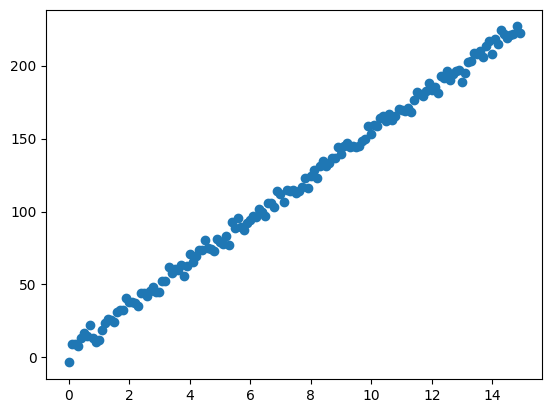

In [135]:
fig, ax = plt.subplots()
ax.scatter(x,y)
plt.show()

In [136]:
def calc_y_pred(x:list, model_weights:int, model_bias:int):
    y_pred = []
    for elem in x:
        y_pred.append(elem * model_weights + model_bias)
    return y_pred



def calc_mse(y:list, y_pred:list):
    mse_error = 0.0
    for i in range(len(y)):
        mse_error += (y_pred[i] - y[i])**2
    return mse_error / len(y)

def calc_grad(x,y,y_pred):
    weight_grad = 0
    bias_grad = 0

    for i in range(len(x)):
        weight_grad += 2*x[i]*(y_pred[i]-y[i])
        bias_grad += 2*(y_pred[i]-y[i])
    
    weight_grad = 2*weight_grad/len(x)
    bias_grad = 2*bias_grad/len(x)

    return weight_grad, bias_grad

def train(x:list, y:list, learning_rate:float = 0.01):
    bias = 0
    weight = random.gauss(0.0, 1.0)
    weight_grad = 0
    bias_grad = 0
    y_pred = calc_y_pred(x, weight, bias)
    ##print(f"y_pred={y_pred}, weight={weight}, bias={bias}")

    for i in range(270):

        for j in range(len(y_pred)):
            weight_grad += x[j]*(y_pred[j]-y[j])
            bias_grad += (y_pred[j]-y[j])
        
        weight_grad = 2*weight_grad / len(y_pred)
        bias_grad = 2*bias_grad / len(y_pred)

        ##tt.append(weight_grad)
        ##aa.append(bias_grad)
        
        weight -= learning_rate * weight_grad
        bias -= bias_grad * learning_rate

        y_pred = calc_y_pred(x,weight,bias) 
    
    return weight, bias



In [137]:
train(x,y,0.01)

(15.011089576246475, 4.392212627889612)

In [138]:
weight, bias = train(x,y,0.01)
calc_mse(y,calc_y_pred(x,weight,bias))

13.208658378566597

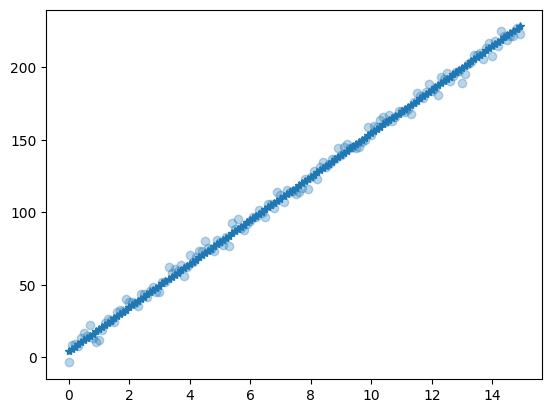

In [139]:
fig, ax = plt.subplots()
ax.scatter(x,y,alpha=0.3)
ax.plot(x,calc_y_pred(x,weight,bias), '*')
plt.show()